In [60]:
import csv
import pandas as pd
import requests
import numpy as np

# DataFrame

In [4]:
#Import the data
movies_df = pd.read_csv('Movies_complete.csv')
movies_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,"Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,"Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"Charlie Hunnam, Astrid Bergès-Frisbey, Jude Law",126 min,English,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066"
3,3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki",128 min,"English, Japanese","United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall",128 min,"English, Russian","United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760"


In [5]:
#Add the revenue in money and in percentage 
movies_df['Revenue'] = movies_df['worldwide_gross']-movies_df['production_budget']

movies_df['%_Revenue'] = (movies_df['Revenue']/movies_df['production_budget'])*100

#Add the list of actors in each movie
movies_df['Actors'].str.split(',')
movies_df['Actors List'] = movies_df['Actors'].str.split(',')

movies_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H..."
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066",-35049292,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude..."
3,3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475",-23283185,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760",1134866322,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]"


## Analysis by year

In [6]:
# Count of movies done by year (trimestral from 2018)

movies_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H..."
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066",-35049292,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude..."
3,3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475",-23283185,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760",1134866322,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]"


In [7]:
#Reformatting the release date to date
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List
0,0,1,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]"
1,1,2,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H..."
2,2,3,2017-05-12,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066",-35049292,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude..."
3,3,4,2013-12-25,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475",-23283185,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]"
4,4,5,2018-06-22,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760",1134866322,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3398,3397,2011-10-28,Like Crazy,250000,3395391,3728400,Paramount Pictures,PG-13,Drama,...,United States,9 wins & 7 nominations,https://m.media-amazon.com/images/M/MV5BMjAzOT...,68,6.6,"62,865","$3,395,391",3478400,1391.360000,"[Felicity Jones, Anton Yelchin, Jennifer Law..."
3396,3399,3398,2000-07-14,Chuck&Buck,250000,1055671,1157672,Artisan,R,Drama,...,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,907672,363.068800,[Movie not found]
3397,3400,3399,1997-03-28,Love and Other Catastrophes,250000,212285,743216,Fox Searchlight,R,Comedy,...,Australia,1 win & 5 nominations,https://m.media-amazon.com/images/M/MV5BMTg5Nj...,58,6.5,"2,055","$294,212",493216,197.286400,"[Frances O'Connor, Alice Garner, Matt Day]"
3398,3401,3400,1998-08-28,I Married a Strange Person,250000,203134,203134,Lionsgate,NaN,Comedy,...,United States,3 wins & 4 nominations,https://m.media-amazon.com/images/M/MV5BOTM2NG...,NaN,6.9,"2,093","$206,272",-46866,-18.746400,"[Charis Michelsen, Tom Larson, Richard Spore]"


In [8]:
#Extract year
movies_df['Year'] = movies_df['release_date'].dt.year
print (movies_df['Year'])

0       2007
1       1995
2       2017
3       2013
4       2018
        ... 
3395    2011
3396    2000
3397    1997
3398    1998
3399    2005
Name: Year, Length: 3400, dtype: int64


In [9]:
#Extract Month
movies_df['Month'] = movies_df['release_date'].dt.month
print (movies_df['Month'])

0        6
1        7
2        5
3       12
4        6
        ..
3395    10
3396     7
3397     3
3398     8
3399     7
Name: Month, Length: 3400, dtype: int64


In [11]:
#Sorting the data frame by year
movies_df.sort_values(by=['Year'], ascending=True)


,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List,Year,Month
3216,3219,3218,1936-02-05,Modern Times,1500000,163245,165049,Kino International,G,Comedy,...,https://m.media-amazon.com/images/M/MV5BYjJiZj...,96,8.5,"253,191","$163,577",-1334951,-88.996733,"[Charles Chaplin, Paulette Goddard, Henry Be...",1936,2
2981,2984,2983,1939-12-15,Gone with the Wind,3900000,198680470,390525192,MGM,G,Drama,...,https://m.media-amazon.com/images/M/MV5BYjUyZW...,97,8.2,"327,145","$200,882,193",386625192,9913.466462,"[Clark Gable, Vivien Leigh, Thomas Mitchell]",1939,12
3115,3118,3117,1940-02-09,Pinocchio,2289247,84300000,84300000,Walt Disney,G,Adventure,...,https://m.media-amazon.com/images/M/MV5BMTU4Mz...,99,7.5,"156,021","$84,254,167",82010753,3582.433569,"[Dickie Jones, Christian Rub, Mel Blanc]",1940,2
3318,3321,3320,1942-08-13,Bambi,858000,102797000,268000000,RKO Radio Pictures,G,Drama,...,https://m.media-amazon.com/images/M/MV5BY2JhMT...,91,7.3,"150,551","$102,247,150",267142000,31135.431235,"[Hardie Albright, Stan Alexander, Bobette Au...",1942,8
3254,3257,3256,1943-01-23,Casablanca,1039000,10462500,10462500,Warner Bros.,PG,Drama,...,https://m.media-amazon.com/images/M/MV5BY2IzZG...,100,8.5,"594,085","$4,219,709",9423500,906.977863,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid]",1943,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2476,2477,2018-06-15,Gotti,10000000,4286367,6089100,Vertical Entertainment,R,Drama,...,https://m.media-amazon.com/images/M/MV5BMjAyOD...,24,4.8,"16,598","$4,343,227",-3910900,-39.109000,"[John Travolta, Spencer Rocco Lofranco, Kell...",2018,6
401,401,402,2018-08-03,Christopher Robin,75000000,98677443,186977443,Walt Disney,PG,Adventure,...,https://m.media-amazon.com/images/M/MV5BMjAzOT...,60,7.2,"82,327","$99,215,042",111977443,149.303257,"[Ewan McGregor, Hayley Atwell, Bronte Carmic...",2018,8
1129,1129,1130,2018-08-17,Mile 22,35000000,36108758,64708758,STX Entertainment,R,Action,...,https://m.media-amazon.com/images/M/MV5BNzUyOD...,38,6.1,"84,932","$36,108,758",29708758,84.882166,"[Mark Wahlberg, Lauren Cohan, Iko Uwais]",2018,8
2397,2397,2398,2018-06-08,Hereditary,10000000,44069456,70090779,A24,R,Horror,...,https://m.media-amazon.com/images/M/MV5BOTU5MD...,87,7.3,"355,261","$44,069,456",60090779,600.907790,"[Toni Collette, Milly Shapiro, Gabriel Byrne]",2018,6


In [12]:
movie_count_year = movies_df['Year'].value_counts()

In [14]:
import matplotlib.pyplot as plt

In [21]:
year_count_filtered = movies_df[movies_df['Year'].between(1995,2019)]
year_count_filtered

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List,Year,Month
0,0,1,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]",2007,6
1,1,2,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H...",1995,7
2,2,3,2017-05-12,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066",-35049292,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude...",2017,5
3,3,4,2013-12-25,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475",-23283185,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]",2013,12
4,4,5,2018-06-22,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760",1134866322,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]",2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3398,3397,2011-10-28,Like Crazy,250000,3395391,3728400,Paramount Pictures,PG-13,Drama,...,https://m.media-amazon.com/images/M/MV5BMjAzOT...,68,6.6,"62,865","$3,395,391",3478400,1391.360000,"[Felicity Jones, Anton Yelchin, Jennifer Law...",2011,10
3396,3399,3398,2000-07-14,Chuck&Buck,250000,1055671,1157672,Artisan,R,Drama,...,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,907672,363.068800,[Movie not found],2000,7
3397,3400,3399,1997-03-28,Love and Other Catastrophes,250000,212285,743216,Fox Searchlight,R,Comedy,...,https://m.media-amazon.com/images/M/MV5BMTg5Nj...,58,6.5,"2,055","$294,212",493216,197.286400,"[Frances O'Connor, Alice Garner, Matt Day]",1997,3
3398,3401,3400,1998-08-28,I Married a Strange Person,250000,203134,203134,Lionsgate,NaN,Comedy,...,https://m.media-amazon.com/images/M/MV5BOTM2NG...,NaN,6.9,"2,093","$206,272",-46866,-18.746400,"[Charis Michelsen, Tom Larson, Richard Spore]",1998,8


<Axes: ylabel='Year'>

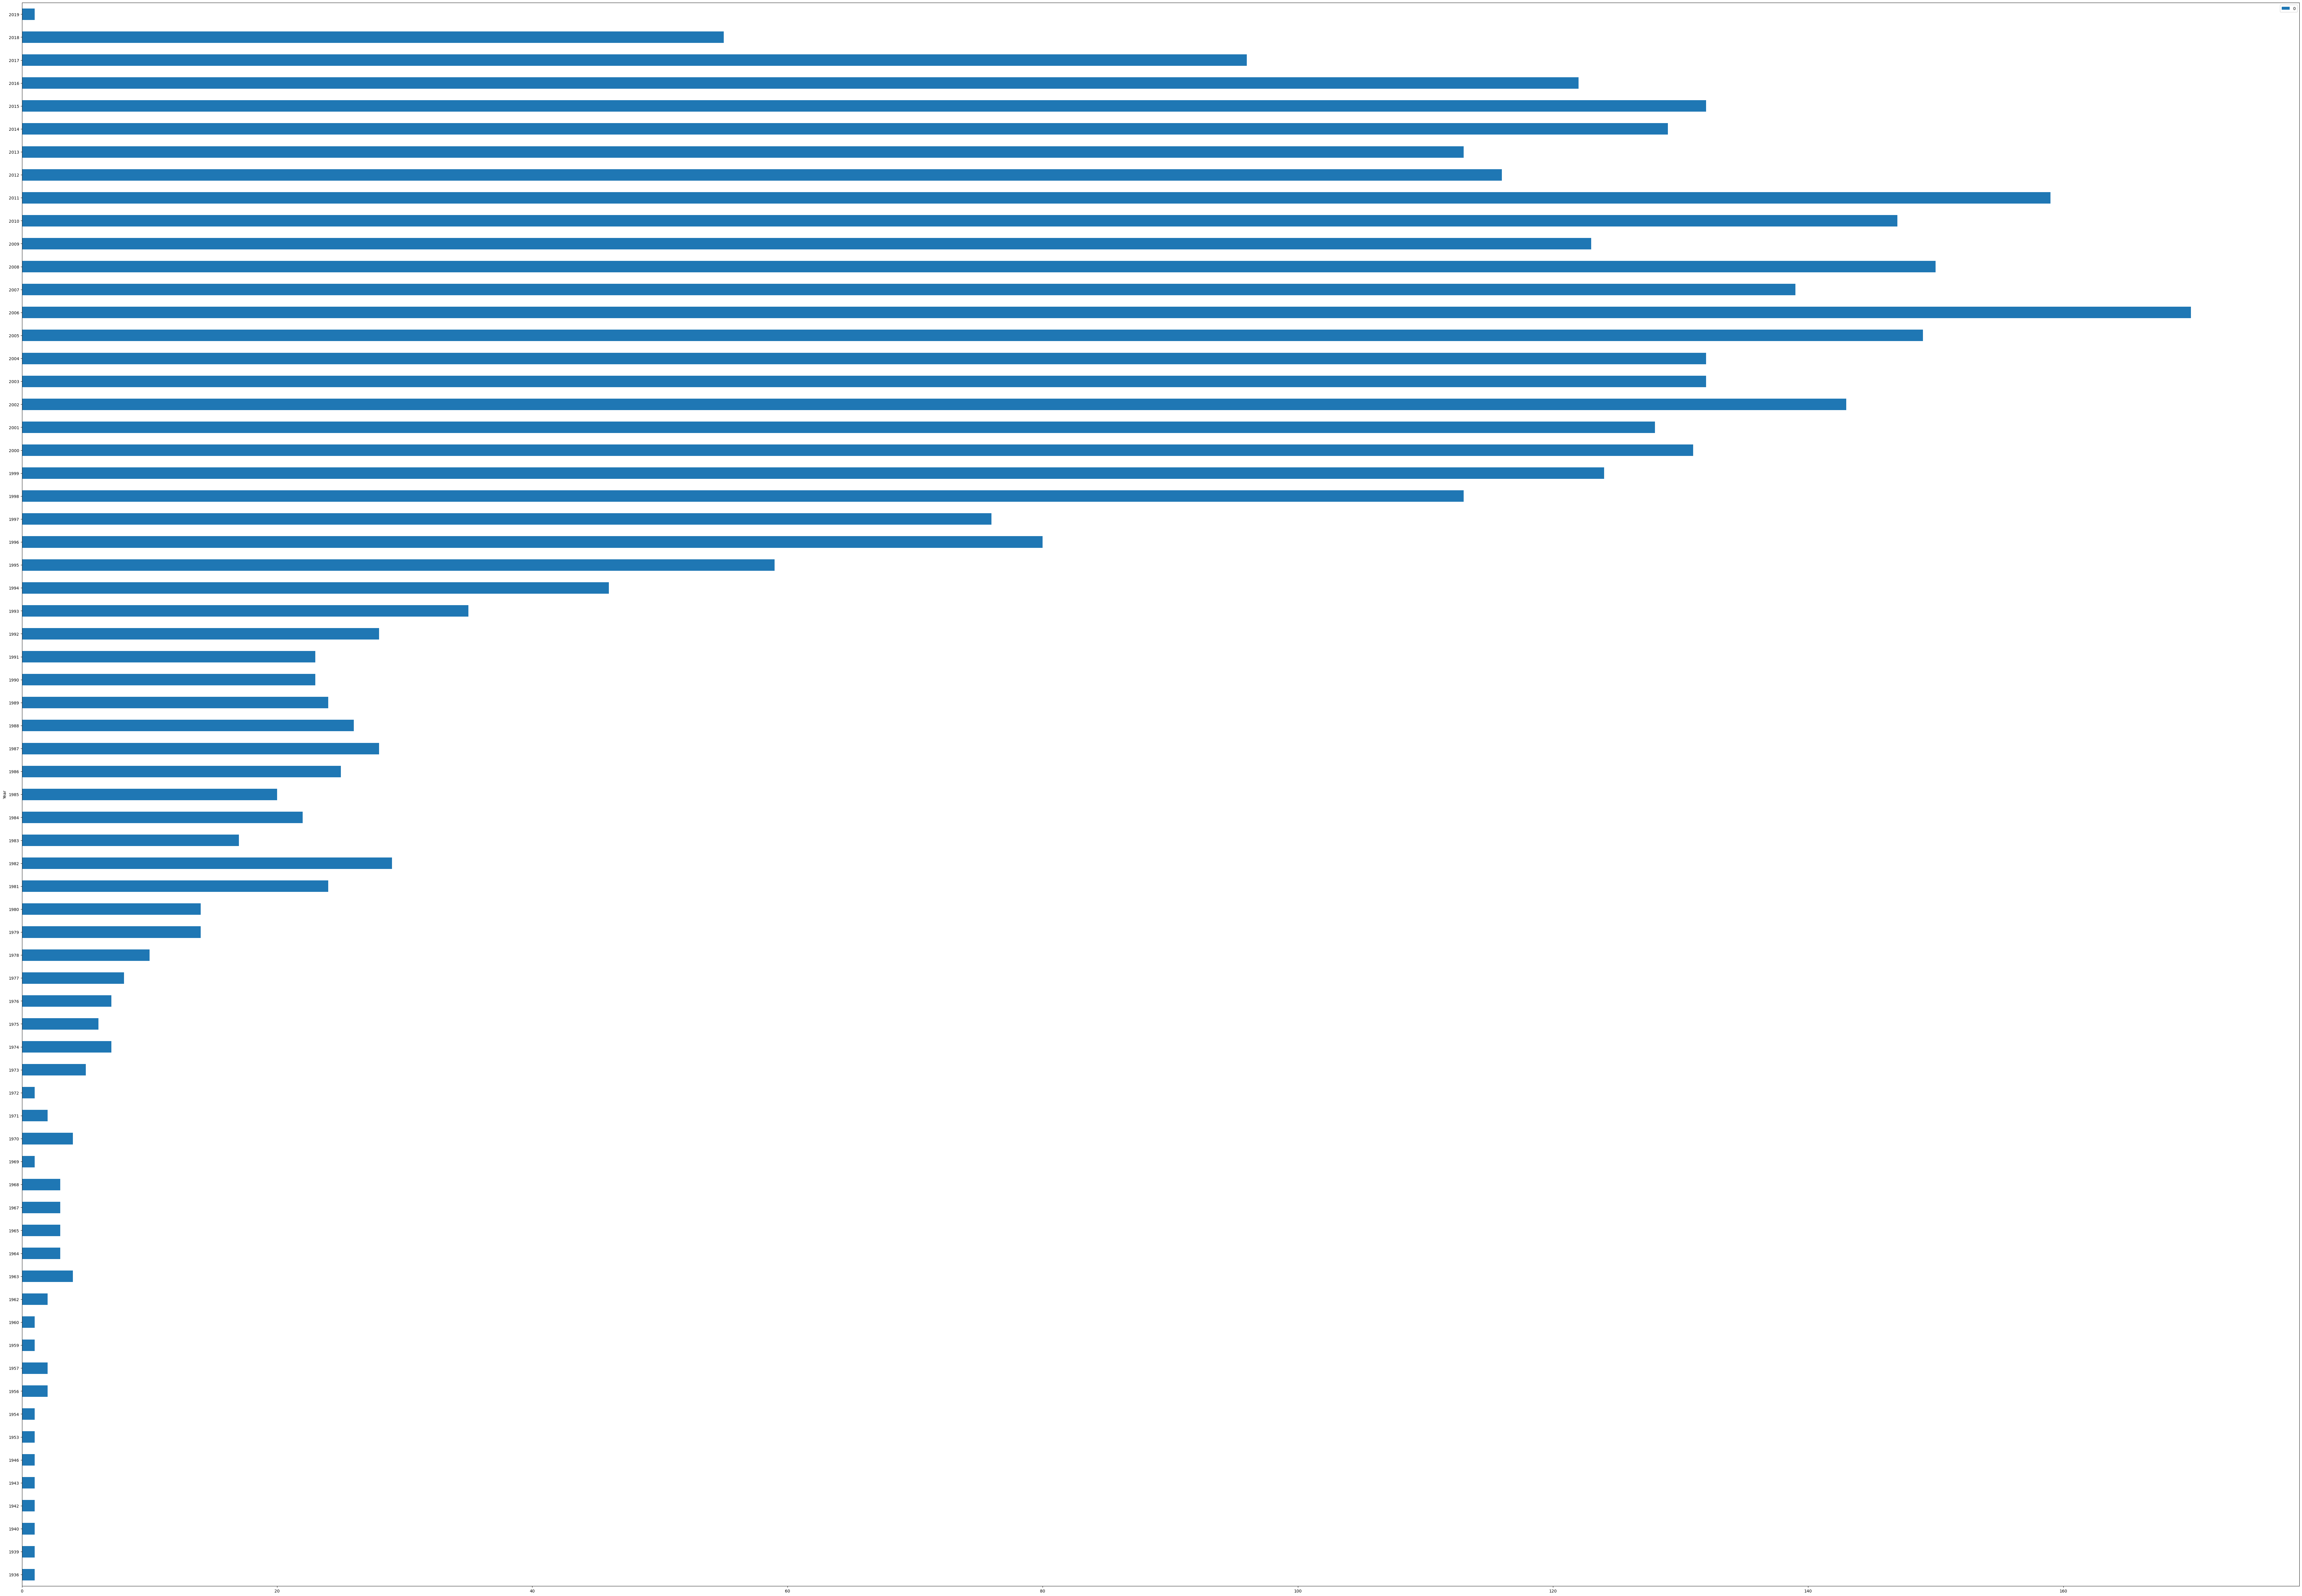

In [18]:
year_count_filtered = movies_df[['Year']].value_counts().reset_index().sort_values(by='Year')
year_count_filtered

#plt.bar(movie_count_year)
year_count_filtered.plot(kind='barh', x='Year', y=0, figsize=(100,70))


- Count of revenue movies (trimestral)

In [22]:
#extracting quarter
movies_df['quarter'] = movies_df['release_date'].dt.quarter
print(movies_df['quarter'])

0       2
1       3
2       2
3       4
4       2
       ..
3395    4
3396    3
3397    1
3398    3
3399    3
Name: quarter, Length: 3400, dtype: int64


In [30]:
#Calculating the quarter revenue by year
quarter_revenue = movies_df.groupby(['Year', 'quarter'])['Revenue'].mean()
quarter_revenue

Year  quarter
1936  1         -1.334951e+06
1939  4          3.866252e+08
1940  1          8.201075e+07
1942  3          2.671420e+08
1943  1          9.423500e+06
                     ...     
2018  1          1.024210e+08
      2          1.670935e+08
      3          1.078697e+08
      4          6.055338e+07
2019  1         -1.000000e+08
Name: Revenue, Length: 213, dtype: float64

In [31]:
#Creating a new dataframe with columns per year
quarter_revenue_df = quarter_revenue.unstack(fill_value=0)
quarter_revenue_df

quarter,1,2,3,4
Year,,,,
1936,-1.334951e+06,0.000000e+00,0.000000e+00,0.000000e+00
1939,0.000000e+00,0.000000e+00,0.000000e+00,3.866252e+08
1940,8.201075e+07,0.000000e+00,0.000000e+00,0.000000e+00
1942,0.000000e+00,0.000000e+00,2.671420e+08,0.000000e+00
1943,9.423500e+06,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...
2015,7.644484e+07,4.899583e+07,1.231918e+08,4.145642e+07
2016,1.033718e+08,5.029585e+07,8.377666e+07,7.569168e+07
2017,9.442575e+07,1.096598e+08,1.306835e+08,1.098940e+08


In [46]:
#Plotting

#year_count_filtered = movies_df[['Year']].value_counts().reset_index().sort_values(by='Year')
#year_count_filtered

quarter_revenue = quarter_revenue[['Year']].sum().reset_index().sort_values(by='Year')

quarter_revenue_df.plot(kind='bar', x='Year', y='quarter', figsize=(100,70))

KeyError: "['Year'] not in index"

- Revenue per producer per year

In [63]:
producer_revenue = movies_df.groupby(['distributor', 'Year'])
producer_revenue = movies_df['Revenue'].sum()
producer_revenue_df = pd.DataFrame(producer_revenue)
producer_revenue_df

ValueError: DataFrame constructor not properly called!

In [64]:
movies_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List,Year,Month,quarter
0,0,1,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]",2007,6,2
1,1,2,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,56,6.3,"205,371","$88,246,220",89246220,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H...",1995,7,3
2,2,3,2017-05-12,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,41,6.7,"226,822","$39,175,066",-35049292,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude...",2017,5,2
3,3,4,2013-12-25,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,28,6.2,"167,943","$38,362,475",-23283185,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]",2013,12,4
4,4,5,2018-06-22,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,51,6.1,"334,600","$417,719,760",1134866322,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]",2018,6,2


In [66]:
#BoxOffice by year

boxoffice_per_year = movies_df.groupby('Year')['BoxOffice'].sum()
boxoffice_per_year

Year
1936                                            $163,577 
1939                                        $200,882,193 
1940                                         $84,254,167 
1942                                        $102,247,150 
1943                                          $4,219,709 
                              ...                        
2015    $93,436,322 $89,760,956 $195,042,377 $154,280,...
2016    $77,041,381 $232,641,920 $103,144,286 $47,365,...
2017    $39,175,066 $146,880,162 $412,845,172 $189,740...
2018    $417,719,760 $335,104,314 $59,874,525 $145,522...
2019                                         $45,216,793 
Name: BoxOffice, Length: 69, dtype: object

In [68]:
#Converting the BoxOffice column to int64

movies_df['BoxOffice']=movies_df['BoxOffice'].astype('float')

ValueError: could not convert string to float: '$100,462,298 '